# Vocal Separation

In [1]:
import numpy as np
import librosa
import matplotlib.pyplot as plt
from IPython.display import Audio

In [2]:
y, sr = librosa.load(librosa.ex('fishin'), duration = 120)

S_full, phase = librosa.magphase(librosa.stft(y))
Audio(data = y[10 * sr: 15 * sr], rate = sr)

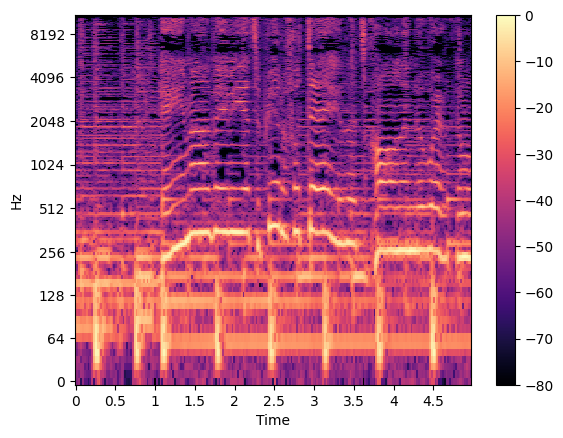

In [4]:
idx = slice(*librosa.time_to_frames([10, 15], sr = sr))
fig, ax = plt.subplots()
img = librosa.display.specshow(librosa.amplitude_to_db(S_full[:, idx], ref = np.max), y_axis = 'log', x_axis = 'time', sr = sr, ax = ax)
fig.colorbar(img, ax = ax)

In [5]:
S_filter = librosa.decompose.nn_filter(S_full, aggregate = np.median, metric = 'cosine', width = int(librosa.time_to_frames(2, sr = sr)))
S_filter = np.minimum(S_full, S_filter)

margin_i, margin_v = 2, 10
power = 2

mask_i = librosa.util.softmask(S_filter, margin_i * (S_full - S_filter), power = power)
mask_v = librosa.util.softmask(S_full - S_filter, margin_v * S_filter, power = power)

S_foreground = mask_v * S_full
S_background = mask_i * S_full

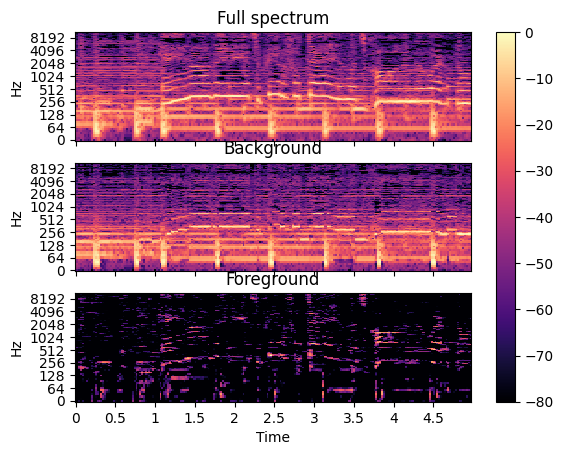

In [7]:
fig, ax = plt.subplots(nrows = 3, sharex = True, sharey = True)
img = librosa.display.specshow(librosa.amplitude_to_db(S_full[:, idx], ref = np.max), y_axis = 'log', x_axis = 'time', sr = sr, ax = ax[0])
ax[0].set(title = 'Full spectrum')
ax[0].label_outer()

librosa.display.specshow(librosa.amplitude_to_db(S_background[:, idx], ref = np.max), y_axis = 'log', x_axis = 'time', sr = sr, ax = ax[1])
ax[1].set(title = 'Background')
ax[1].label_outer()

librosa.display.specshow(librosa.amplitude_to_db(S_foreground[:, idx], ref = np.max), y_axis = 'log', x_axis = 'time', sr = sr, ax = ax[2])
ax[2].set(title = 'Foreground')
fig.colorbar(img , ax = ax)